In this notebook, I compare the positional differences of ICRF catalogs with respect to the Gaia DR2 as function of the declination.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: catalog_error_comparison.py
"""
Created on Sun May 27 15:28:04 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Plot the smoothed declination difference as a function of declination of various catalogs.

"""

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from matplotlib import pyplot as plt
import numpy as np

# My modules
from my_progs.catalog.read_icrf import read_icrf1, read_icrf2, read_icrf3
from my_progs.catalog.read_gaia import read_dr2_iers
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.catalog.smoothed_error import smooth_by_dec


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Read the catalogs.

In [2]:
# ICRF1 catalog
icrf1 = read_icrf1()

# ICRF2 catalog
icrf2 = read_icrf2()

# ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")

# ICRF3 K catalog
icrf3k = read_icrf3(wv="k")

# ICRF3 X/Ka catalog
icrf3xka = read_icrf3(wv="xka")

# Gaia DR2 aux_iers catalog
gdr2 = read_dr2_iers()

Calculate the positional offsets.

In [3]:
# ICRF1 - Gaia DR2
icrf1_gdr2 = radio_cat_diff_calc(icrf1, gdr2, "iers_name")
icrf1_gdr2.keep_columns(["dec", "dra", "ddec"])
icrf1_gdr2.filled()

print("There are", len(icrf1_gdr2), "sources between ICRF1 and Gaia DR2")

# ICRF2 - Gaia DR2
icrf2_gdr2 = radio_cat_diff_calc(icrf2, gdr2, "iers_name")
icrf2_gdr2.keep_columns(["dec", "dra", "ddec"])
icrf2_gdr2.filled()

print("There are", len(icrf2_gdr2), "sources between ICRF2 and Gaia DR2")

# ICRF3 SX - Gaia DR2
icrf3sx_gdr2 = radio_cat_diff_calc(icrf3sx, gdr2, "iers_name")
icrf3sx_gdr2.keep_columns(["dec", "dra", "ddec"])
icrf3sx_gdr2.filled()

print("There are", len(icrf3sx_gdr2), "sources between ICRF3 SX and Gaia DR2")

# ICRF3 K - Gaia DR2
icrf3k_gdr2 = radio_cat_diff_calc(icrf3k, gdr2, "iers_name")
icrf3k_gdr2.keep_columns(["dec", "dra", "ddec"])
icrf3k_gdr2.filled()

print("There are", len(icrf3k_gdr2), "sources between ICRF3 K and Gaia DR2")

# ICRF3 Xka Gaia DR2
icrf3xka_gdr2 = radio_cat_diff_calc(icrf3xka, gdr2, "iers_name")
icrf3xka_gdr2.keep_columns(["dec", "dra", "ddec"])
icrf3xka_gdr2.filled()

print("There are", len(icrf3xka_gdr2), "sources between ICRF3 XKa and Gaia DR2")

There are 490 sources between ICRF1 and Gaia DR2
There are 2327 sources between ICRF2 and Gaia DR2
There are 2820 sources between ICRF3 SX and Gaia DR2
There are 602 sources between ICRF3 K and Gaia DR2
There are 505 sources between ICRF3 XKa and Gaia DR2


First, I try with binning sources with a size of 50 sources.

In [4]:
# Bin the data by 5 degree interval

binsize = 20

# ICRF1
icrf1_dec_bin = np.trunc(np.arange(len(icrf1_gdr2)) / binsize)
icrf1_gdr2.sort("dec")
icrf1_grouped = icrf1_gdr2.group_by(icrf1_dec_bin)
icrf1_binned = icrf1_grouped.groups.aggregate(np.median)

binsize = 50

# ICRF2
icrf2_dec_bin = np.trunc(np.arange(len(icrf2_gdr2)) / binsize)
icrf2_gdr2.sort("dec")
icrf2_grouped = icrf2_gdr2.group_by(icrf2_dec_bin)
icrf2_binned = icrf2_grouped.groups.aggregate(np.median)

# ICRF3 SX
icrf3sx_dec_bin = np.trunc(np.arange(len(icrf3sx_gdr2)) / binsize)
icrf3sx_gdr2.sort("dec")
icrf3sx_grouped = icrf3sx_gdr2.group_by(icrf3sx_dec_bin)
icrf3sx_binned = icrf3sx_grouped.groups.aggregate(np.median)

binsize = 20

# ICRF3 K
icrf3k_dec_bin = np.trunc(np.arange(len(icrf3k_gdr2)) / binsize)
icrf3k_gdr2.sort("dec")
icrf3k_grouped = icrf3k_gdr2.group_by(icrf3k_dec_bin)
icrf3k_binned = icrf3k_grouped.groups.aggregate(np.median)

print(icrf3k_binned)

# ICRF3 XKa
icrf3xka_dec_bin = np.trunc(np.arange(len(icrf3xka_gdr2)) / binsize)
icrf3xka_gdr2.sort("dec")
icrf3xka_grouped = icrf3xka_gdr2.group_by(icrf3xka_dec_bin)
icrf3xka_binned = icrf3xka_grouped.groups.aggregate(np.median)

        dec                  dra                  ddec        
        deg                  mas                  mas         
------------------- --------------------- --------------------
 -71.39194325160538  0.017055487975208148  0.15822916736851764
-59.606089584819046   0.14311140083174306  0.22311655243356648
-48.102555297004145   0.09448116014900403  0.17419174582755656
 -41.20287835207943  -0.05997338614355534  0.19274856271067617
-35.883776806542684   0.03453260038130572  0.10089451194517095
 -30.16120406018989   0.12830205614897588  0.22168058748661676
-26.260661563668915  0.002299767007902624 0.028259366047223008
-21.744675515032718   -0.0707670441760739  0.07853875629848515
-17.461916632488723     0.083329543971712  0.06436764081740874
-13.929310609940448 -0.012568001467460083 0.024948161936322318
                ...                   ...                  ...
 24.786014474741904  -0.11428838618252544 -0.09576217578910472
 27.989927797088885  0.019089009447504048  0.1502248053

/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


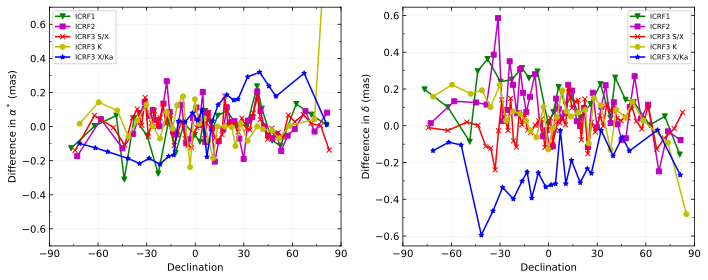

In [5]:
from matplotlib.ticker import MultipleLocator
minorLocator1 = MultipleLocator(0.1)
minorLocator2 = MultipleLocator(15)

# Plot for median error
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.plot(icrf1_binned["dec"], icrf1_binned["dra"], "g-v", ms=5, label="ICRF1")

ax0.plot(icrf2_binned["dec"], icrf2_binned["dra"], "m-s", ms=5, label="ICRF2")

ax0.plot(icrf3sx_binned["dec"], icrf3sx_binned["dra"], "r-x", ms=5, label="ICRF3 S/X")

ax0.plot(icrf3k_binned["dec"], icrf3k_binned["dra"], "y-o", ms=5, label="ICRF3 K")

ax0.plot(icrf3xka_binned["dec"], icrf3xka_binned["dra"], "b-*", ms=5, label="ICRF3 X/Ka")

ax0.set_ylim([-0.7, 0.7])
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))

ax0.set_xlabel("Declination")
ax0.set_ylabel("Difference in $\\alpha^*$ (mas)")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

ax0.yaxis.set_minor_locator(minorLocator1)
ax0.xaxis.set_minor_locator(minorLocator2)

ax0.grid()  
ax0.legend(fontsize="x-small")

ax1.plot(icrf1_binned["dec"], icrf1_binned["ddec"], "g-v", ms=5, label="ICRF1")

ax1.plot(icrf2_binned["dec"], icrf2_binned["ddec"], "m-s", ms=5, label="ICRF2")

ax1.plot(icrf3sx_binned["dec"], icrf3sx_binned["ddec"], "r-x", ms=5, label="ICRF3 S/X")

ax1.plot(icrf3k_binned["dec"], icrf3k_binned["ddec"], "y-o", ms=5, label="ICRF3 K")

ax1.plot(icrf3xka_binned["dec"], icrf3xka_binned["ddec"], "b-*", ms=5, label="ICRF3 X/Ka")

# ax1.set_ylim([-0.7, 0.7])
ax1.set_xlim([-90, 90])
ax1.set_xticks(np.arange(-90, 91, 30))

ax1.set_xlabel("Declination")
ax1.set_ylabel("Difference in $\\delta$ (mas)")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

ax1.yaxis.set_minor_locator(minorLocator1)
ax1.xaxis.set_minor_locator(minorLocator2)

ax1.grid()  
ax1.legend(fontsize="x-small")

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2)

Then I try a running median method.

In [6]:
# Smooth the positional difference of catalogs
bin_size = 50

# ICRF1 wrt. Gaia DR2
dec_icrf1, dra_icrf1 = smooth_by_dec(
    np.array(icrf1_gdr2["dec"]), np.array(icrf1_gdr2["dra"]), bin_size)
dec_icrf1, ddec_icrf1 = smooth_by_dec(
    np.array(icrf1_gdr2["dec"]), np.array(icrf1_gdr2["ddec"]), bin_size)

# ICRF2 wrt. Gaia DR2
dec_icrf2, dra_icrf2 = smooth_by_dec(
    np.array(icrf2_gdr2["dec"]), np.array(icrf2_gdr2["dra"]), bin_size)
dec_icrf2, ddec_icrf2=smooth_by_dec(
    np.array(icrf2_gdr2["dec"]), np.array(icrf2_gdr2["ddec"]), bin_size)

# ICRF3(SX) wrt. Gaia DR2
dec_icrf3sx, dra_icrf3sx=smooth_by_dec(
    np.array(icrf3sx_gdr2["dec"]), np.array(icrf3sx_gdr2["dra"]), bin_size)
dec_icrf3sx, ddec_icrf3sx=smooth_by_dec(
    np.array(icrf3sx_gdr2["dec"]), np.array(icrf3sx_gdr2["ddec"]), bin_size)

# ICRF3(K) wrt. Gaia DR2
dec_icrf3k, dra_icrf3k=smooth_by_dec(
    np.array(icrf3k_gdr2["dec"]), np.array(icrf3k_gdr2["dra"]), bin_size)
dec_icrf3k, ddec_icrf3k=smooth_by_dec(
    np.array(icrf3k_gdr2["dec"]), np.array(icrf3k_gdr2["ddec"]), bin_size)

# ICRF3(XKa) wrt. Gaia DR2
dec_icrf3xka, dra_icrf3xka=smooth_by_dec(
    np.array(icrf3xka_gdr2["dec"]), np.array(icrf3xka_gdr2["dra"]), bin_size)
dec_icrf3xka, ddec_icrf3xka=smooth_by_dec(
    np.array(icrf3xka_gdr2["dec"]), np.array(icrf3xka_gdr2["ddec"]), bin_size)

/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


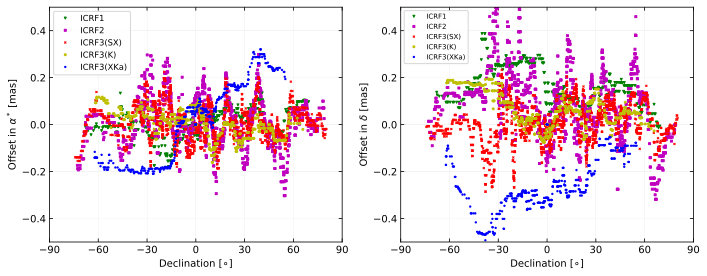

In [7]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))
ax0.plot(dec_icrf1, dra_icrf1, "gv", ms=2, label="ICRF1")
ax0.plot(dec_icrf2, dra_icrf2, "ms", ms=2, label="ICRF2")
ax0.plot(dec_icrf3sx, dra_icrf3sx, "rx", ms=2, label="ICRF3(SX)")
ax0.plot(dec_icrf3k, dra_icrf3k, "yo", ms=2, label="ICRF3(K)")
ax0.plot(dec_icrf3xka, dra_icrf3xka, "b*", ms=2, label="ICRF3(XKa)")

ax0.set_xlim([-90, 90])
ax0.set_ylim([-0.5, 0.5])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination [$\\circ$]")
ax0.set_ylabel("Offset in $\\alpha^*$ [mas]")
ax0.grid()
ax0.legend(fontsize="small")

ax1.plot(dec_icrf1, ddec_icrf1, "gv", ms=2, label="ICRF1")
ax1.plot(dec_icrf2, ddec_icrf2, "ms", ms=2, label="ICRF2")
ax1.plot(dec_icrf3sx, ddec_icrf3sx, "rx", ms=2, label="ICRF3(SX)")
ax1.plot(dec_icrf3k, ddec_icrf3k, "yo", ms=2, label="ICRF3(K)")
ax1.plot(dec_icrf3xka, ddec_icrf3xka, "b*", ms=2, label="ICRF3(XKa)")

ax1.set_ylim([-0.5, 0.5])
ax1.set_xlabel("Declination [$\\circ$]")
ax1.set_ylabel("Offset in $\\delta$ [mas]")
ax1.grid()
ax1.legend(fontsize="x-small")

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

Then I try with quasars with G<18.7.

In [8]:
mask = (gdr2["phot_g_mean_mag"] < 18.7)
gdr2bgt = gdr2[mask].filled()

In [9]:
# ICRF1 - Gaia DR2 bright sample
icrf1_gdr2bgt = radio_cat_diff_calc(icrf1, gdr2bgt, "iers_name")
icrf1_gdr2bgt.keep_columns(["dec", "dra", "ddec"])
icrf1_gdr2bgt.filled()

print("There are", len(icrf1_gdr2bgt), "sources between ICRF1 and Gaia DR2 bright sample")

# ICRF2 - Gaia DR2 bright sample
icrf2_gdr2bgt = radio_cat_diff_calc(icrf2, gdr2bgt, "iers_name")
icrf2_gdr2bgt.keep_columns(["dec", "dra", "ddec"])
icrf2_gdr2bgt.filled()

print("There are", len(icrf2_gdr2bgt), "sources between ICRF2 and Gaia DR2 bright sample")

# ICRF3 SX - Gaia DR2 bright sample
icrf3sx_gdr2bgt = radio_cat_diff_calc(icrf3sx, gdr2bgt, "iers_name")
icrf3sx_gdr2bgt.keep_columns(["dec", "dra", "ddec"])
icrf3sx_gdr2bgt.filled()

print("There are", len(icrf3sx_gdr2bgt), "sources between ICRF3 SX and Gaia DR2 bright sample")

# ICRF3 K - Gaia DR2 bright sample
icrf3k_gdr2bgt = radio_cat_diff_calc(icrf3k, gdr2bgt, "iers_name")
icrf3k_gdr2bgt.keep_columns(["dec", "dra", "ddec"])
icrf3k_gdr2bgt.filled()

print("There are", len(icrf3k_gdr2bgt), "sources between ICRF3 K and Gaia DR2 bright sample")

# ICRF3 Xka Gaia DR2 bright sample
icrf3xka_gdr2bgt = radio_cat_diff_calc(icrf3xka, gdr2bgt, "iers_name")
icrf3xka_gdr2bgt.keep_columns(["dec", "dra", "ddec"])
icrf3xka_gdr2bgt.filled()

print("There are", len(icrf3xka_gdr2bgt), "sources between ICRF3 XKa and Gaia DR2 bright sample")

There are 326 sources between ICRF1 and Gaia DR2 bright sample
There are 1052 sources between ICRF2 and Gaia DR2 bright sample
There are 1288 sources between ICRF3 SX and Gaia DR2 bright sample
There are 326 sources between ICRF3 K and Gaia DR2 bright sample
There are 286 sources between ICRF3 XKa and Gaia DR2 bright sample


In [10]:
# Bin the data by 5 degree interval

binsize = 10

# ICRF1
icrf1_dec_bin = np.trunc(np.arange(len(icrf1_gdr2bgt)) / binsize)
icrf1_gdr2bgt.sort("dec")
icrf1_grouped = icrf1_gdr2bgt.group_by(icrf1_dec_bin)
icrf1_binned = icrf1_grouped.groups.aggregate(np.median)

binsize = 25

# ICRF2
icrf2_dec_bin = np.trunc(np.arange(len(icrf2_gdr2bgt)) / binsize)
icrf2_gdr2bgt.sort("dec")
icrf2_grouped = icrf2_gdr2bgt.group_by(icrf2_dec_bin)
icrf2_binned = icrf2_grouped.groups.aggregate(np.median)

print(icrf2_binned)

# ICRF3 SX
icrf3sx_dec_bin = np.trunc(np.arange(len(icrf3sx_gdr2bgt)) / binsize)
icrf3sx_gdr2bgt.sort("dec")
icrf3sx_grouped = icrf3sx_gdr2bgt.group_by(icrf3sx_dec_bin)
icrf3sx_binned = icrf3sx_grouped.groups.aggregate(np.median)

binsize = 10

# ICRF3 K
icrf3k_dec_bin = np.trunc(np.arange(len(icrf3k_gdr2bgt)) / binsize)
icrf3k_gdr2bgt.sort("dec")
icrf3k_grouped = icrf3k_gdr2bgt.group_by(icrf3k_dec_bin)
icrf3k_binned = icrf3k_grouped.groups.aggregate(np.median)

# print(icrf3k_binned)

# ICRF3 XKa
icrf3xka_dec_bin = np.trunc(np.arange(len(icrf3xka_gdr2bgt)) / binsize)
icrf3xka_gdr2bgt.sort("dec")
icrf3xka_grouped = icrf3xka_gdr2bgt.group_by(icrf3xka_dec_bin)
icrf3xka_binned = icrf3xka_grouped.groups.aggregate(np.median)

        dec                  dra                  ddec        
        deg                  mas                  mas         
------------------- --------------------- --------------------
 -71.14543184833607  -0.16052629301935126 -0.01174366843770258
-56.567544030516814  -0.06829950112369687   0.1265713933662482
 -44.63350066814008   0.04617179083531105  0.12943466458636974
  -38.2030622281936  -0.06053782746435935   0.0165877168001316
 -32.85463704905051    0.2034607406547157   0.2971293099562899
 -29.72291796881025 0.0030276206309163755  0.17225850825752784
-26.312051715246156   0.04662676585475149   0.1564755876870549
 -23.63633534253423  -0.10047154003216767  0.42550258996243423
 -21.62476240260549  -0.11082316328621092   0.2641858316110301
-18.594080045035664   0.19780317715885662 -0.10718976426460357
                ...                   ...                  ...
   42.2009571136983  -0.03461440865796738   0.1815452236542114
  45.51103644950134  -0.09949268226171645 -0.0899581209

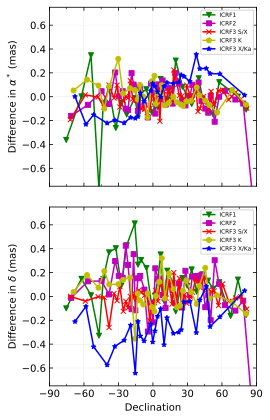

In [11]:
from matplotlib.ticker import MultipleLocator
minorLocator1 = MultipleLocator(0.1)
minorLocator2 = MultipleLocator(15)

# Plot for median error
fig, (ax0, ax1) = plt.subplots(figsize=(4, 6), nrows=2, sharey=True, sharex=True)

ax0.plot(icrf1_binned["dec"], icrf1_binned["dra"], "g-v", ms=5, label="ICRF1")

ax0.plot(icrf2_binned["dec"], icrf2_binned["dra"], "m-s", ms=5, label="ICRF2")

ax0.plot(icrf3sx_binned["dec"], icrf3sx_binned["dra"], "r-x", ms=5, label="ICRF3 S/X")

ax0.plot(icrf3k_binned["dec"], icrf3k_binned["dra"], "y-o", ms=5, label="ICRF3 K")

ax0.plot(icrf3xka_binned["dec"], icrf3xka_binned["dra"], "b-*", ms=5, label="ICRF3 X/Ka")

ax0.set_ylim([-0.75, 0.75])
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))

# ax0.set_xlabel("Declination")
ax0.set_ylabel("Difference in $\\alpha^*$ (mas)")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")

# ax0.yaxis.set_minor_locator(minorLocator1)
ax0.xaxis.set_minor_locator(minorLocator2)

ax0.grid()  
ax0.legend(fontsize="xx-small")

ax1.plot(icrf1_binned["dec"], icrf1_binned["ddec"], "g-v", ms=5, label="ICRF1")

ax1.plot(icrf2_binned["dec"], icrf2_binned["ddec"], "m-s", ms=5, label="ICRF2")

ax1.plot(icrf3sx_binned["dec"], icrf3sx_binned["ddec"], "r-x", ms=5, label="ICRF3 S/X")

ax1.plot(icrf3k_binned["dec"], icrf3k_binned["ddec"], "y-o", ms=5, label="ICRF3 K")

ax1.plot(icrf3xka_binned["dec"], icrf3xka_binned["ddec"], "b-*", ms=5, label="ICRF3 X/Ka")

# ax1.set_ylim([-0.6, 0.6])
ax1.set_xlim([-90, 90])
ax1.set_xticks(np.arange(-90, 91, 30))

ax1.set_xlabel("Declination")
ax1.set_ylabel("Difference in $\\delta$ (mas)")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")

# ax1.yaxis.set_minor_locator(minorLocator1)
# ax1.xaxis.set_minor_locator(minorLocator2)

ax1.grid()  
ax1.legend(fontsize="xx-small")

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2)